In [1]:
import xarray as xr
import numpy as np
from sunpy.visualization.colormaps import cm

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
zarr_path = '/d0/euv/aia/preprocessed/aia_hmi_stacks_2010_2023_1d_small.zarr'

In [3]:
aia_hmi_stacks = xr.open_zarr(zarr_path)
aia_hmi_stacks

<xarray.Dataset>
Dimensions:  (t_obs: 11, channel: 8, x: 4096, y: 4096)
Coordinates:
  * channel  (channel) object 'aia094' 'aia131' 'aia171' ... 'aia335' 'hmilos'
  * t_obs    (t_obs) datetime64[ns] 2010-06-02T07:48:09.558000 ... 2010-06-12...
Dimensions without coordinates: x, y
Data variables:
    aia_hmi  (t_obs, channel, x, y) float32 dask.array<chunksize=(1, 8, 4096, 4096), meta=np.ndarray>

In [4]:
aia_hmi_stacks.aia_hmi

<xarray.DataArray 'aia_hmi' (t_obs: 11, channel: 8, x: 4096, y: 4096)>
dask.array<open_dataset-aia_hmi, shape=(11, 8, 4096, 4096), dtype=float32, chunksize=(1, 8, 4096, 4096), chunktype=numpy.ndarray>
Coordinates:
  * channel  (channel) object 'aia094' 'aia131' 'aia171' ... 'aia335' 'hmilos'
  * t_obs    (t_obs) datetime64[ns] 2010-06-02T07:48:09.558000 ... 2010-06-12...
Dimensions without coordinates: x, y
Attributes: (12/54)
    acs_cgt:   ['GT3', 'GT3', 'GT3', 'GT3', 'GT3', 'GT3', 'GT3', 'GT3', 'GT3'...
    acs_eclp:  ['NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', '...
    acs_mode:  ['SCIENCE', 'SCIENCE', 'SCIENCE', 'SCIENCE', 'SCIENCE', 'SCIEN...
    acs_safe:  ['NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', '...
    acs_sunp:  ['YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES'...
    asd_rec:   ['sdo.lev0_asd_0004[:#2682303]', 'sdo.lev0_asd_0004[:#2703912]...
    ...        ...
    sat_z0:    [10.4429216, 10.4203882, 13.9037781, 7.86909056, 12.9632883, 1...
    t_obs:     ['2010-06-02T07:48:09.558', '2010-06-03T07:48:09.551', '2010-0...
    t_rec:     ['2010-06-02T07:48:02.000', '2010-06-03T07:48:02.000', '2010-0...
    telescop:  ['SDO/AIA', 'SDO/AIA', 'SDO/AIA', 'SDO/AIA', 'SDO/AIA', 'SDO/A...
    x0_mp:     [2047.87, 2047.87, 2047.43994, 2047.43994, 2047.43994, 2047.43...
    y0_mp:     [2048.67993, 2048.67993, 2049.27002, 2049.27002, 2049.27002, 2...

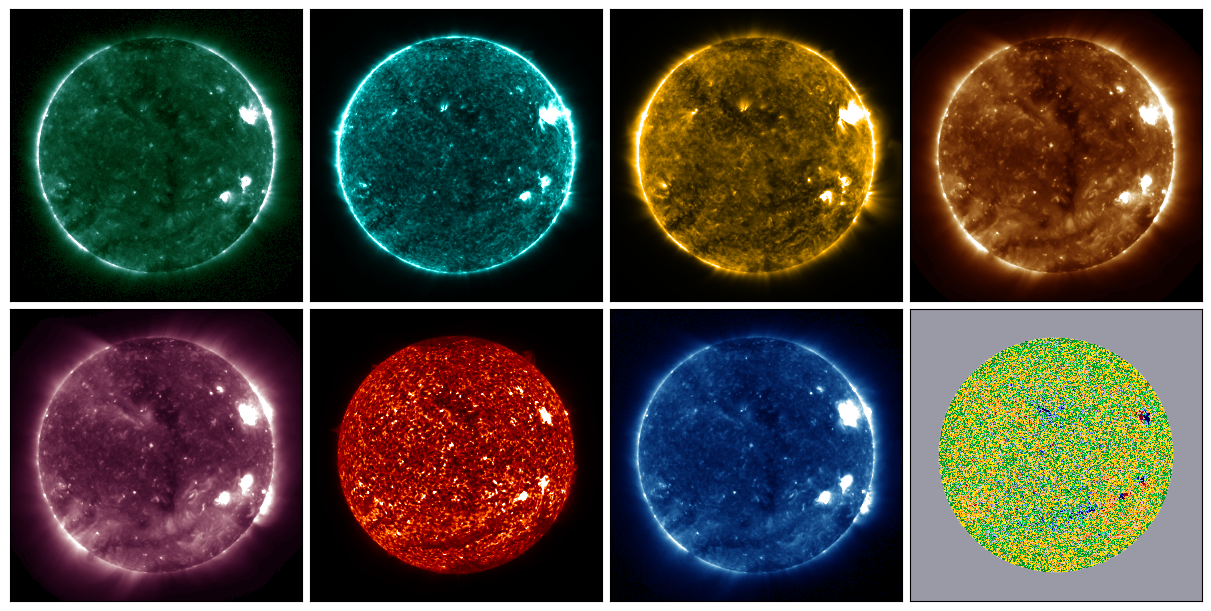

In [5]:
index = np.random.choice(np.arange(aia_hmi_stacks.t_obs.shape[0]))
t_obs = aia_hmi_stacks.t_obs[index].data

fig = plt.figure(figsize=[12,6], constrained_layout=True)
spec = fig.add_gridspec(ncols=4, nrows=2, wspace=0, hspace=0)

for i, channel in enumerate(aia_hmi_stacks.channel):
    # Set colormap
    if channel.data == 'aia094':
        cmap = 'sdoaia94'
    elif 'hmi' in str(channel.data):
        cmap = 'hmimag'
    else:
        cmap = 'sdo' + str(channel.data)

    # Set vlim
    loaded_data = aia_hmi_stacks.aia_hmi.loc[t_obs,channel.data, :, :].load()
    if 'hmi' in str(channel.data):
        vmax = np.nanpercentile(np.abs(loaded_data), 99)
        vmin = -vmax
    else:
        vmax = np.nanpercentile(np.abs(loaded_data), 99)
        vmin = 0

    ax = fig.add_subplot(spec[i//4, i%4])
    ax.imshow(loaded_data.data, cmap=cmap, vmin=vmin, vmax=vmax)
    ax.set_xticks([])
    ax.set_yticks([])

    

In [6]:
loaded_data

<xarray.DataArray 'aia_hmi' (x: 4096, y: 4096)>
array([[1.e-10, 1.e-10, 1.e-10, ..., 1.e-10, 1.e-10, 1.e-10],
       [1.e-10, 1.e-10, 1.e-10, ..., 1.e-10, 1.e-10, 1.e-10],
       [1.e-10, 1.e-10, 1.e-10, ..., 1.e-10, 1.e-10, 1.e-10],
       ...,
       [1.e-10, 1.e-10, 1.e-10, ..., 1.e-10, 1.e-10, 1.e-10],
       [1.e-10, 1.e-10, 1.e-10, ..., 1.e-10, 1.e-10, 1.e-10],
       [1.e-10, 1.e-10, 1.e-10, ..., 1.e-10, 1.e-10, 1.e-10]],
      dtype=float32)
Coordinates:
    channel  <U6 'hmilos'
    t_obs    datetime64[ns] 2010-06-05T07:48:09.552000
Dimensions without coordinates: x, y
Attributes: (12/54)
    acs_cgt:   ['GT3', 'GT3', 'GT3', 'GT3', 'GT3', 'GT3', 'GT3', 'GT3', 'GT3'...
    acs_eclp:  ['NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', '...
    acs_mode:  ['SCIENCE', 'SCIENCE', 'SCIENCE', 'SCIENCE', 'SCIENCE', 'SCIEN...
    acs_safe:  ['NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', '...
    acs_sunp:  ['YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES'...
    asd_rec:   ['sdo.lev0_asd_0004[:#2682303]', 'sdo.lev0_asd_0004[:#2703912]...
    ...        ...
    sat_z0:    [10.4429216, 10.4203882, 13.9037781, 7.86909056, 12.9632883, 1...
    t_obs:     ['2010-06-02T07:48:09.558', '2010-06-03T07:48:09.551', '2010-0...
    t_rec:     ['2010-06-02T07:48:02.000', '2010-06-03T07:48:02.000', '2010-0...
    telescop:  ['SDO/AIA', 'SDO/AIA', 'SDO/AIA', 'SDO/AIA', 'SDO/AIA', 'SDO/A...
    x0_mp:     [2047.87, 2047.87, 2047.43994, 2047.43994, 2047.43994, 2047.43...
    y0_mp:     [2048.67993, 2048.67993, 2049.27002, 2049.27002, 2049.27002, 2...